In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CSP Class
class CSP:
    def __init__(self , board , n):
        self.board = board
        self.n = n

    def Copy(self): 
        return CSP([[int(i) for i in row] for row in self.board] , self.n)   
    
    # Print table
    def PrintTable(self):
        table = np.array(self.board)
        _ , im = plt.subplots()
        im.matshow(table, cmap='binary')

        for i in range(len(table)):
            for j in range(len(table[i])):
                if (i + j) % 2 == 0:
                    SquareColor = 'white'
                else:
                    SquareColor = 'black'
                im.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=SquareColor))
                if table[i, j] == 1:
                    plt.text(j, i, '♕', ha='center', va='center', color='r', fontsize=20)

        plt.show()   
    # Find the sum of the threats 
    #(including two ministers in a row,
    # in the same diagonal (left or diagonal))

    def Constraint(self, row, col):
        flag = 0 # counter

        # Ministers should not be in the same row
        for i in range(self.n):
            if i != col and self.board[row][i] == 1:
                flag += 1
        # Check the diameter (toward the top left)    
        r, c = row, col
        while r >= 0 and c >= 0:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r -= 1
            c -= 1
        # Check the diameter (toward the bottom right)
        r, c = row, col
        while r < self.n and c < self.n:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r += 1
            c += 1
        # Check the diameter (toward the bottom left)
        r, c = row, col
        while r < self.n and c >= 0:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r += 1
            c -= 1
        # Check the diameter (toward the top right)
        r, c = row, col
        while r >= 0 and c < self.n:
            if r != row and c != col and self.board[r][c] == 1:
                flag += 1
            r -= 1
            c += 1
        # return the sum of threats
        return flag
    # Is the chess table safe or not?
    def Is_Goal(self):
        for i in range(self.n):
            for j in range(self.n):
                if self.board[i][j] == 1 and self.menace(i, j) != 0:
                    return False
        return True
    # Find the total number of
    # neighbors for those
    # in a particular column and row

    def neighbor(self, row, col):
        flag = 0

        for i in range(self.n):
            if i != col:
                flag += 1
        for j in range(self.n):
            if j != row:
                flag += 1

        r = row ; c = col
        while r >= 0 and c >= 0:
            if r != row and c != col:
                flag += 1
            r -= 1
            c -= 1

        r = row ; c = col
        while r < self.n and c < self.n:
            if r != row and c != col:
                flag += 1
            r += 1
            c += 1

        r = row ; c = col
        while r < self.n and c >= 0:
            if r != row and c != col:
                flag += 1
            r += 1
            c -= 1

        r = row ; c = col
        while r >= 0 and c < self.n:
            if r != row and c != col:
                flag += 1
            r -= 1
            c += 1

        return flag 
    # Find the total number of 
    # threats on a chessboard

    def Total_Threat(self):
        flag=0

        for i in range(self.n):
            for j in range(self.n):
                if self.board[i][j]==1:
                    flag += self.Constraint(i , j)  
        return flag 

In [3]:
# It is fully and accurately explained in PDF
def SelectUnassignedVariable(csp , assignment):
    answer = []
    # print(csp.n , assignment.count('unassigned'))
    if assignment.count('unassigned') == csp.n:
        for c in range(csp.n):
            flag = 0
            for r in range(csp.n):
                flag += csp.neighbor(r , c)
                   
            answer.append(flag)

        assignment[answer.index(max(answer))] = 'assigned'    
        return answer.index(max(answer))            

    else:
        Min = inf ; index = -1
        for i in range(csp.n):
            if assignment[i]=='unassigned':
                f = 0
                for j in range(csp.n):
                    if not csp.Constraint(j , i):
                        f += 1
                if Min > f:
                    Min = f
                    index = i
        assignment[index]='assigned'            
        return index    

In [4]:
# Which rows in a column
# should be selected in order
# (More details in PDF)

def OrderDomainValue(csp , var):
    order = []
    for i in range(csp.n):
        CSP_Copy = csp.Copy()
        CSP_Copy.board[i][var] = 1
        threat = CSP_Copy.Total_Threat()
        order.append(threat)
    
    result = sorted(range(len(order)), key=lambda x: order[x])
    return result
# Backbacktracking search 

In [5]:
def BT(csp, assignment):

    # If all columns are assigned,
    # we must return true
    if assignment.count('assigned') == csp.n:
        return True
    
    var = SelectUnassignedVariable(csp , assignment)

    for i in OrderDomainValue(csp , var):
        CSP_Copy = csp.Copy()
        if not CSP_Copy.Constraint(i-1 , var):  
            CSP_Copy.board[i-1][var] = 1  
            if BT(CSP_Copy , assignment):
                for j in range(csp.n):
                    for k in range(csp.n):
                        csp.board[j][k] = CSP_Copy.board[j][k]
                return True
            
    # to backbacktrack    
    assignment[var] = 'unassigned'
    return False

In [6]:
def test(n):
    table = [[0 for _ in range(n)] for _ in range(n)]
    sample = CSP(table , n)
    assignment = ['unassigned' for _ in range(n)]

    if not BT(sample , assignment):
        print("Solution does not exist")
    else:
        print("Solution found!")
        sample.PrintTable()

Solution found!


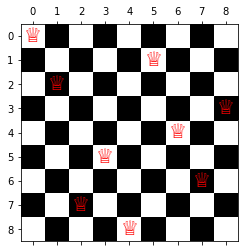

In [7]:
test(9)

Solution found!


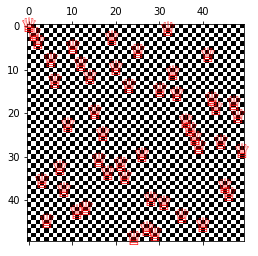

In [8]:
test(50)

Solution found!


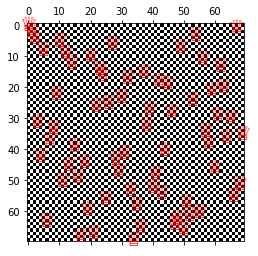

In [43]:
test(70)

Solution found!


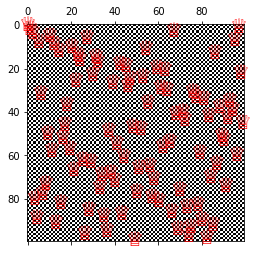

In [44]:
test(100)